In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
Boa_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="BOA")
Cbe_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="CBE")
GlobalBank_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="Global Bank")
Wegagen_data  = pd.read_excel("./data/BANKS AD DATA.xlsx",sheet_name="Wegagen")

In [ ]:
# Convert the 'Post Hour' column to string format
Boa_data['Post Hour'] = Boa_data['Post Hour'].astype(str)

In [3]:
# Assessing Missing Values
missing_values = Boa_data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Date           0
Post link      0
View           0
Post Hour      0
Bank           0
Time of day    0
dtype: int64


In [4]:
# Checking Data Consistency
date_consistency = Boa_data['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).notnull().all()
print("Date Consistency:", date_consistency)


Date Consistency: True


C:\Users\huawei\AppData\Local\Temp\ipykernel_4528\3740107653.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_consistency = Boa_data['Date'].apply(lambda x: pd.to_datetime(x, errors='coerce')).notnull().all()


In [5]:
# Checking Data Integrity
valid_urls = Boa_data['Post link'].str.startswith('https://t.me/tikvahethiopia/').all()
print("Valid URLs:", valid_urls)

non_negative_views = (Boa_data['View'] >= 0).all()
print("Non-negative Views:", non_negative_views)

Valid URLs: True
Non-negative Views: True


In [6]:
# Checking Data Duplicates
duplicates = Boa_data.duplicated().sum()
print("Duplicate Records:", duplicates)


Duplicate Records: 0


In [7]:
# Data Range Validation
view_range_valid = (Boa_data['View'] >= 0) & (Boa_data['View'] <= 1000000)
print("View Range Validation:")
print(view_range_valid)

View Range Validation:
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
Name: View, dtype: bool


# Time-based Analysis

C:\Users\huawei\AppData\Local\Temp\ipykernel_4528\666763056.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Boa_data['Date'] = pd.to_datetime(Boa_data['Date'])


        Date                          Post link    View Post Hour Bank  \
0 2023-09-26  https://t.me/tikvahethiopia/81734  239800  10:18:00  BOA   
1 2023-09-19  https://t.me/tikvahethiopia/81606  258400  06:53:00  BOA   
2 2023-09-15  https://t.me/tikvahethiopia/81502  269400  03:56:00  BOA   
3 2023-08-09  https://t.me/tikvahethiopia/81338  219400  10:50:00  BOA   
4 2023-05-09  https://t.me/tikvahethiopia/81252  255900  01:19:00  BOA   

  Time of day  Weekday  Month  Year  
0      night         1      9  2023  
1      night         1      9  2023  
2    evening         4      9  2023  
3   afternoon        2      8  2023  
4   afternoon        1      5  2023  


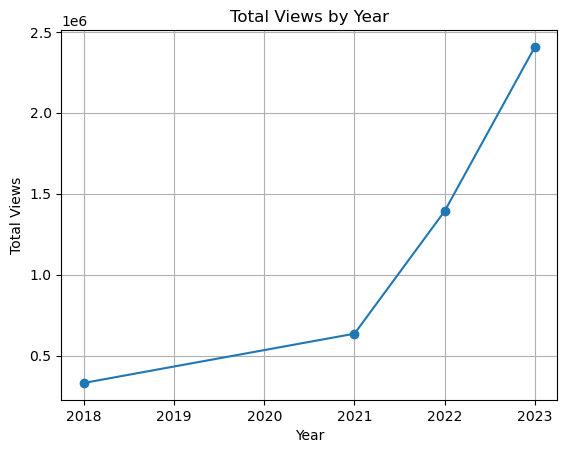

In [8]:

Boa_data['Date'] = pd.to_datetime(Boa_data['Date'])
Boa_data['Weekday'] = Boa_data['Date'].dt.weekday
Boa_data['Month'] = Boa_data['Date'].dt.month
Boa_data['Year'] = Boa_data['Date'].dt.year
print(Boa_data.head())


# Group data by year and calculate the total views
yearly_views = Boa_data.groupby('Year')['View'].sum()

# Create a line chart
plt.plot(yearly_views.index, yearly_views.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.title('Total Views by Year')
plt.grid(True)
plt.show()

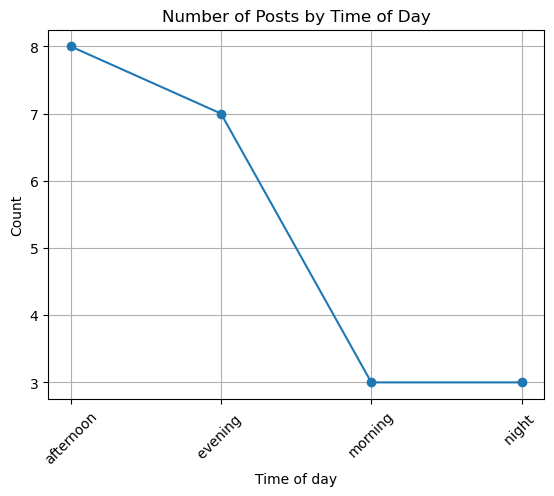

In [10]:
# Grouping and Aggregation
grouped_by_time = Boa_data['Time of day'].value_counts().sort_index()

# Create a time series chart
plt.plot(grouped_by_time.index, grouped_by_time.values, marker='o')
plt.xlabel('Time of day')
plt.ylabel('Count')
plt.title('Number of Posts by Time of Day')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Data Filtering for specific period of time 
filtered_data = Boa_data[(Boa_data['Date'] >= '2022-01-01') & (Boa_data['View'] > 250000)]
print(filtered_data)

         Date                          Post link    View Post Hour Bank  \
1  2023-09-19  https://t.me/tikvahethiopia/81606  258400  06:53:00  BOA   
2  2023-09-15  https://t.me/tikvahethiopia/81502  269400  03:56:00  BOA   
4  2023-05-09  https://t.me/tikvahethiopia/81252  255900  01:19:00  BOA   
5  2023-01-09  https://t.me/tikvahethiopia/81165  259100  10:20:00  BOA   
9  2023-01-25  https://t.me/tikvahethiopia/76075  299100  11:38:00  BOA   
11 2022-03-03  https://t.me/tikvahethiopia/68259  259400  05:30:00  BOA   

   Time of day  Weekday  Month  Year  
1       night         1      9  2023  
2     evening         4      9  2023  
4    afternoon        1      5  2023  
5    afternoon        0      1  2023  
9     evening         2      1  2023  
11   afternoon        3      3  2022  


# Bivariate Analysis

<Axes: xlabel='Date'>

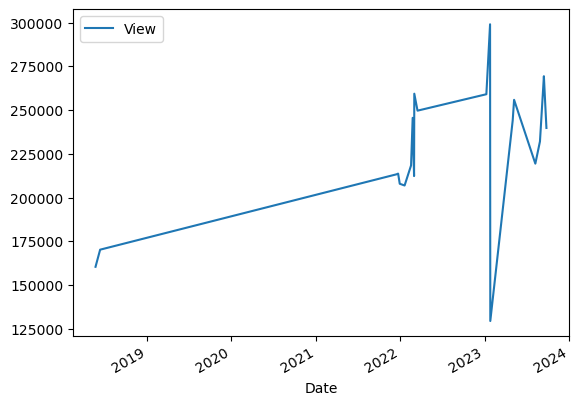

In [28]:

# Date vs. View
date_vs_view = Boa_data[['Date', 'View']]
date_vs_view.plot(x='Date', y='View', kind='line')


<Axes: xlabel='Bank'>

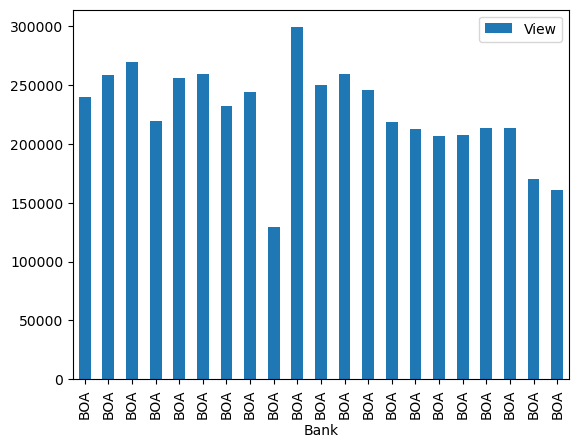

In [30]:
# Bank vs. View
bank_vs_view = Boa_data[['Bank', 'View']]
bank_vs_view.plot(x='Bank', y='View', kind='bar')

In [41]:
# Convert 'Date' column to datetime format
Boa_data['Date'] = pd.to_datetime(Boa_data['Date'], dayfirst=True)


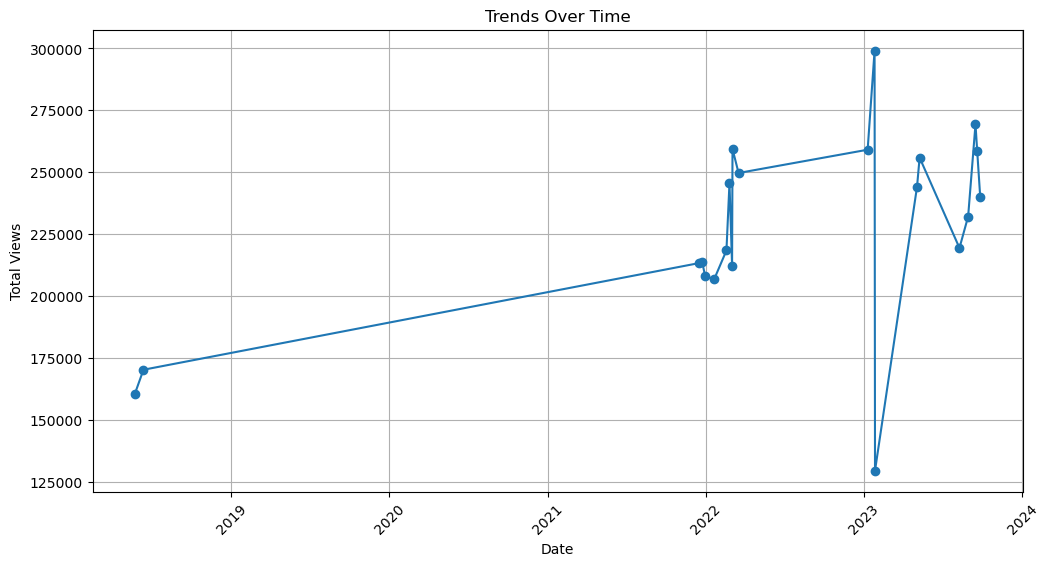

In [40]:
# Data Comparison
# Calculate total views per date
views_per_date = Boa_data.groupby('Date')['View'].sum()

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(views_per_date.index, views_per_date.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Total Views')
plt.title('Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

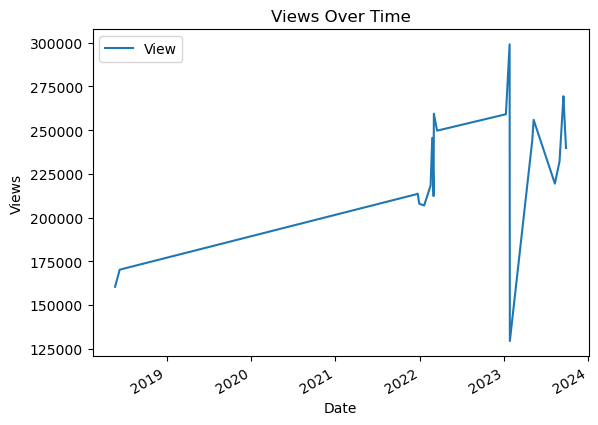

In [9]:
#  Visualization
Boa_data.plot(x='Date', y='View', kind='line')
plt.title('Views Over Time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.show()


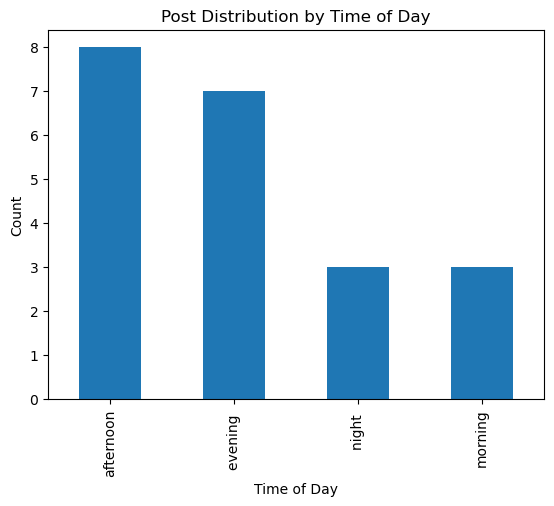

In [10]:
Boa_data['Time of day'].value_counts().plot(kind='bar')
plt.title('Post Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

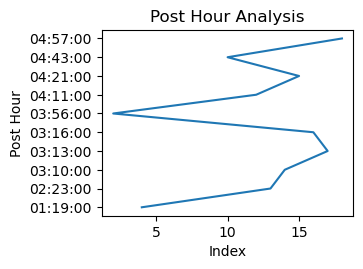

In [21]:
# Sort the 'Post Hour' column in ascending order
Boa_data.sort_values(by='Post Hour', inplace=True)

# Extract the first ten data points of the 'Post Hour' column
post_hour = Boa_data['Post Hour'].head(10)
view = Boa_data['View']

# Create the first chart - Line chart for 'Post Hour'
plt.subplot(2, 2, 1)
plt.plot(post_hour)
plt.xlabel('Index')
plt.ylabel('Post Hour')
plt.title('Post Hour Analysis')

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()